<a href="https://colab.research.google.com/github/angelohafner/linguagem-de-programacao-udesc/blob/main/RLC_Serie_Subamortecido_Analitico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🔹 Circuito RLC Série Subamortecido e sua Analogia com o Movimento Torcional

---

## 1. Circuito RLC Série — Caso Subamortecido

### 1.1 Equação diferencial geral

Para um circuito RLC série em regime transitório (fonte desligada após $t = 0$):

$$
v_R + v_L + v_C = 0
$$

Sabendo que:

$$
v_R = Ri, \quad v_L = L \frac{di}{dt}, \quad v_C = \frac{1}{C} \int i \, dt
$$

Derivando em relação ao tempo e rearranjando, obtemos a **equação diferencial homogênea**:

$$
L \frac{d^2 i}{dt^2} + R \frac{di}{dt} + \frac{i}{C} = 0
$$

Dividindo tudo por $L$:

$$
\frac{d^2 i}{dt^2} + \frac{R}{L} \frac{di}{dt} + \frac{1}{LC} i = 0
$$

---

### 1.2 Forma padrão e parâmetros característicos

$$
\frac{d^2 i}{dt^2} + 2\alpha \frac{di}{dt} + \omega_0^2 i = 0
$$

onde:

- $\alpha = \frac{R}{2L}$ → **fator de amortecimento**
- $\omega_0 = \frac{1}{\sqrt{LC}}$ → **frequência natural não amortecida**

---

### 1.3 Caso Subamortecido ($\alpha < \omega_0$)

Neste regime, o sistema oscila, mas com amplitude decrescente no tempo.  
A solução da equação diferencial é:

$$
i(t) = e^{-\alpha t} \left( A_1 \cos(\omega_d t) + A_2 \sin(\omega_d t) \right)
$$

onde:

$$
\omega_d = \sqrt{\omega_0^2 - \alpha^2}
$$

é a **frequência amortecida** (menor que $\omega_0$).

---

### 1.4 Comportamento físico

- A corrente $i(t)$ oscila com frequência $\omega_d$.
- A envoltória $e^{-\alpha t}$ representa o decaimento exponencial da amplitude.
- O sistema troca energia entre o indutor (campo magnético) e o capacitor (campo elétrico), com perdas resistivas no resistor.

---

### 1.5 Representação gráfica

**(Figura 1.1 — Corrente subamortecida em circuito RLC série — Fonte: Alexander e Sadiku, *Fundamentals of Electric Circuits*, 6ª edição, p. 317)**

- Eixo x: tempo $t$
- Eixo y: corrente $i(t)$
- Oscilações amortecidas com envoltória exponencial decrescente.

---

## 2. Analogia com o Movimento Torcional de um Eixo

O circuito RLC é **análogo** ao sistema mecânico rotacional massa–mola–amortecedor, conforme o quadro abaixo:

| Sistema Elétrico (RLC Série) | Sistema Mecânico Rotacional (Eixo) |
|-------------------------------|-------------------------------------|
| Corrente $i(t)$ | Velocidade angular $\omega(t)$ |
| Carga $q(t)$ | Deslocamento angular $\theta(t)$ |
| Indutor $L$ | Momento de inércia $J$ |
| Resistor $R$ | Coeficiente de atrito viscoso $b$ |
| Capacitor $C$ | Mola torcional (constante $K$) |
| Tensão $v(t)$ | Torque aplicado $T(t)$ |

---

### 2.1 Equação diferencial do movimento torcional

$$
J \frac{d^2 \theta}{dt^2} + b \frac{d\theta}{dt} + K \theta = 0
$$

Comparando com o circuito RLC:

$$
L \frac{d^2 q}{dt^2} + R \frac{dq}{dt} + \frac{1}{C} q = 0
$$

A correspondência é direta:

$$
L \leftrightarrow J, \quad R \leftrightarrow b, \quad \frac{1}{C} \leftrightarrow K
$$

---

### 2.2 Caso Subamortecido (Sistema Oscilatório Amortecido)

Quando:

$$
\zeta = \frac{b}{2\sqrt{JK}} < 1
$$

o sistema é **subamortecido**, e o deslocamento angular segue:

$$
\theta(t) = e^{-\zeta \omega_n t} (B_1 \cos(\omega_d t) + B_2 \sin(\omega_d t))
$$

onde:

$$
\omega_n = \sqrt{\frac{K}{J}}, \quad \omega_d = \omega_n \sqrt{1 - \zeta^2}
$$

O comportamento é o mesmo da corrente $i(t)$ no circuito RLC.

---

### 2.3 Interpretação física da analogia

| Fenômeno Elétrico | Fenômeno Mecânico |
|--------------------|-------------------|
| Energia armazenada no capacitor → campo elétrico | Energia elástica armazenada na mola torcional |
| Energia armazenada no indutor → campo magnético | Energia cinética rotacional do eixo |
| Dissipação no resistor | Perdas por atrito viscoso |
| Oscilação da corrente amortecida | Oscilação angular amortecida |

---

### 2.4 Representação comparativa

**(Figura 2.2 — Analogia entre circuito RLC e sistema torcional amortecido — Fonte: conteúdo extrapolado, não presente no livro-base)**

- Dois diagramas lado a lado:
  - (a) Circuito RLC série  
  - (b) Eixo com mola torcional e amortecedor viscoso

---

## 3. Resumo e Interpretação Final

| Conceito | Circuito RLC | Sistema Torcional |
|-----------|---------------|-------------------|
| Equação | $L i'' + R i' + \frac{1}{C} i = 0$ | $J \theta'' + b \theta' + K \theta = 0$ |
| Parâmetro de amortecimento | $\alpha = \frac{R}{2L}$ | $\zeta = \frac{b}{2\sqrt{JK}}$ |
| Frequência natural | $\omega_0 = \frac{1}{\sqrt{LC}}$ | $\omega_n = \sqrt{\frac{K}{J}}$ |
| Caso subamortecido | $\alpha < \omega_0$ | $\zeta < 1$ |
| Solução | Oscilação amortecida de $i(t)$ | Oscilação amortecida de $\theta(t)$ |

---

### 🧭 **Resumo Conceitual**

> O circuito RLC série subamortecido e o sistema torcional com atrito viscoso leve são ambos sistemas **de segunda ordem oscilatórios amortecidos**, em que a energia alterna entre duas formas armazenadas (magnética/elétrica ou cinética/elástica), enquanto parte é dissipada (resistor ou atrito).

---


omega0 = 1000.000000 rad/s
alpha  = 50.000000 1/s
Delta  = -3990000.000000
omegad = 998.749218 rad/s
Simulação analítica concluída com sucesso.
Escalas configuradas em notação de engenharia (potências de 10 múltiplas de 3).
Arquivos salvos: q_t.png, i_t.png, di_dt.png


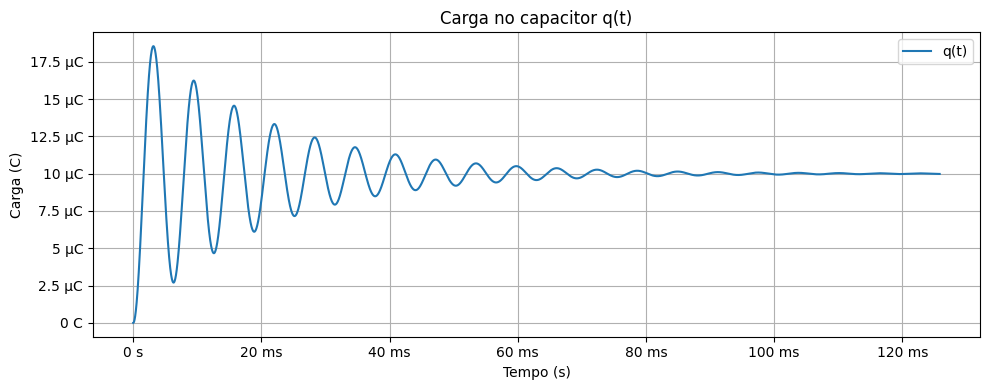

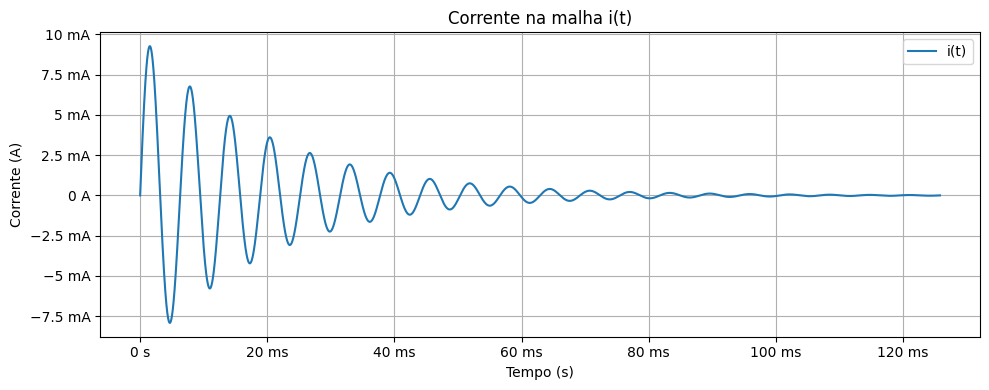

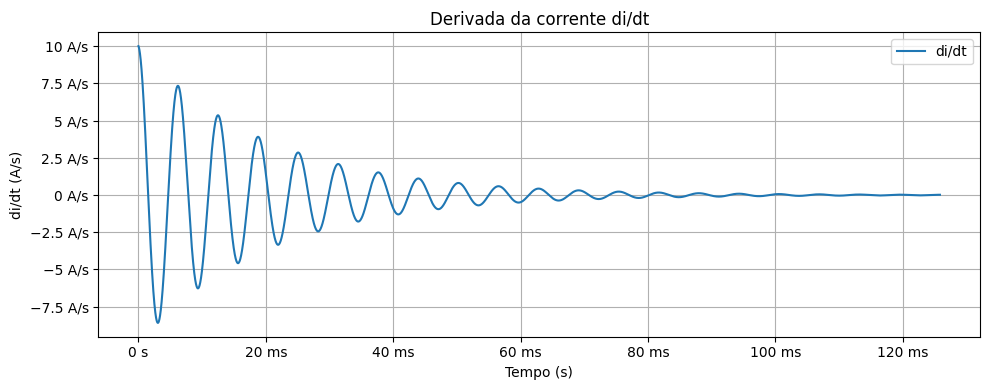

In [15]:
# Analytic solution for underdamped series RLC step response
# Comments in English (no seaborn; wider figures; R = 10 ohms; engineering notation on axes)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import EngFormatter

def rlc_analytic_step(E=1.0, R=10.0, L=100e-3, C=10e-6, n_periods=6, n_points=20000, out_dir=r"."):
    """
    Analytic solution for q(t), i(t), and di/dt of a series RLC driven by a 1 V DC step.
    Solves ONLY if underdamped (Delta < 0). Otherwise, prints a message and returns.
    """

    alpha = R / (2.0 * L)
    omega0 = 1.0 / np.sqrt(L * C)
    Delta = (R / L)**2 - 4.0 / (L * C)

    print(f"omega0 = {omega0:.6f} rad/s")
    print(f"alpha  = {alpha:.6f} 1/s")
    print(f"Delta  = {Delta:.6f}")

    if Delta >= 0.0:
        print("O circuito não é subamortecido. Por favor, troque os valores de R, L e C.")
        return

    omegad = np.sqrt(omega0*omega0 - alpha*alpha)
    print(f"omegad = {omegad:.6f} rad/s")

    # Time axis
    Td = 2.0 * np.pi / omegad
    t_max = n_periods * Td
    t = np.linspace(0.0, t_max, int(n_points))

    # Steady-state charge
    q_ss = C * E

    exp_term = np.exp(-alpha * t)
    cos_term = np.cos(omegad * t)
    sin_term = np.sin(omegad * t)

    q = q_ss * (1.0 - exp_term * (cos_term + (alpha / omegad) * sin_term))
    i = (E / (L * omegad)) * exp_term * sin_term
    di_dt = (E / L) * exp_term * (cos_term - (alpha / omegad) * sin_term)

    # Engineering notation formatter
    eng_format = EngFormatter(unit="s")

    # q(t)
    plt.figure(figsize=(10, 4))
    plt.plot(t, q, label="q(t)")
    plt.title("Carga no capacitor q(t)")
    plt.xlabel("Tempo (s)")
    plt.ylabel("Carga (C)")
    plt.grid(True)
    plt.legend()
    plt.gca().xaxis.set_major_formatter(eng_format)
    plt.gca().yaxis.set_major_formatter(EngFormatter(unit="C"))
    plt.tight_layout()
    plt.savefig(out_dir + r"/q_t.png", dpi=300)

    # i(t)
    plt.figure(figsize=(10, 4))
    plt.plot(t, i, label="i(t)")
    plt.title("Corrente na malha i(t)")
    plt.xlabel("Tempo (s)")
    plt.ylabel("Corrente (A)")
    plt.grid(True)
    plt.legend()
    plt.gca().xaxis.set_major_formatter(eng_format)
    plt.gca().yaxis.set_major_formatter(EngFormatter(unit="A"))
    plt.tight_layout()
    plt.savefig(out_dir + r"/i_t.png", dpi=300)

    # di/dt
    plt.figure(figsize=(10, 4))
    plt.plot(t, di_dt, label="di/dt")
    plt.title("Derivada da corrente di/dt")
    plt.xlabel("Tempo (s)")
    plt.ylabel("di/dt (A/s)")
    plt.grid(True)
    plt.legend()
    plt.gca().xaxis.set_major_formatter(eng_format)
    plt.gca().yaxis.set_major_formatter(EngFormatter(unit="A/s"))
    plt.tight_layout()
    plt.savefig(out_dir + r"/di_dt.png", dpi=300)

    print("Simulação analítica concluída com sucesso.")
    print("Escalas configuradas em notação de engenharia (potências de 10 múltiplas de 3).")
    print("Arquivos salvos: q_t.png, i_t.png, di_dt.png")

if __name__ == "__main__":
    rlc_analytic_step(E=1.0, R=10.0, L=100e-3, C=10e-6, n_periods=20, n_points=20000, out_dir=r".")


### 🧠 Prompt — Solução Analítica da Resposta ao Degrau de um Circuito RLC Série Subamortecido

Escreva um código em **Python** que calcule e plote a **resposta analítica ao degrau** de um **circuito RLC série subamortecido** (com valores dados de R, L e C).

**Requisitos:**
- O código deve resolver analiticamente para **carga q(t)**, **corrente i(t)** e **derivada da corrente di/dt** considerando uma entrada de degrau DC de 1 V.  
- Verifique se o circuito é **subamortecido** (Δ < 0) antes de gerar os gráficos.  
- Utilize apenas as bibliotecas `numpy` e `matplotlib` (**não usar seaborn**).  
- Formate os eixos em **notação de engenharia** usando `matplotlib.ticker.EngFormatter`.  
- Adicione **comentários em inglês** e imprima os valores calculados de $\alpha$, $\omega_0$, $\omega_d$ e Δ.  
- Use os seguintes parâmetros padrão:  
  - R = 10 Ω  
  - L = 100 mH  
  - C = 10 μF  
- Gere **três figuras separadas e largas** (≈10×4 in):  
  1. q(t) — carga no capacitor  
  2. i(t) — corrente na malha  
  3. di/dt — derivada da corrente  
- Salve cada figura em **formato PNG** no diretório atual.  
- Configure os eixos com **notação de engenharia** (segundos, coulombs, amperes, A/s).  
- Exiba mensagens de confirmação após cada etapa.  
- O código deve ser **executável de forma independente**, incluindo um bloco `main`.

---

💬 **Opcionais sugeridos:**
- “Adicione grade (grid), legendas e títulos em inglês.”  
- “Garanta espessura e rótulos consistentes nas linhas.”  
- “Certifique-se de que o código roda no Google Colab sem modificações.”  
